In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

np.random.seed(0)
X, Y = make_moons(n_samples=500, noise=0.2)
Y = Y.reshape(Y.shape[0], 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

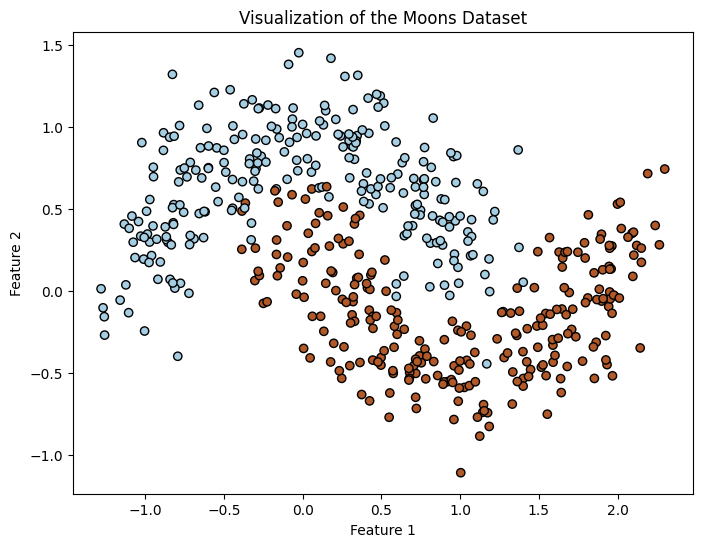

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=Y.ravel(), cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Visualization of the Moons Dataset")
plt.show()

In [11]:
input_dim = X_train.shape[1]
hidden_dim = 5
output_dim = 1

def initialize_parameters():
    np.random.seed(1)
    W1 = np.random.randn(hidden_dim, input_dim) * 0.01
    b1 = np.zeros((hidden_dim, 1))
    W2 = np.random.randn(output_dim, hidden_dim) * 0.01
    b2 = np.zeros((output_dim, 1))
    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

def tanh(x):
    return np.tanh(x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [12]:
def forward_propagation(X, parameters):
    W1, b1, W2, b2 = parameters["W1"], parameters["b1"], parameters["W2"], parameters["b2"]
    Z1 = np.dot(W1, X.T) + b1
    A1 = tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    return A2, cache

def compute_cost(A2, Y):
    m = Y.shape[0]
    cost = -np.sum(Y.T * np.log(A2) + (1 - Y.T) * np.log(1 - A2)) / m
    return np.squeeze(cost)

In [8]:
def backward_propagation(X, Y, parameters, cache):
    m = X.shape[0]
    W2 = parameters["W2"]
    A1, A2 = cache["A1"], cache["A2"]

    dZ2 = A2 - Y.T
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = np.dot(dZ1, X) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return grads


def update_parameters(parameters, grads, learning_rate=0.01):
    for key in parameters.keys():
        parameters[key] -= learning_rate * grads["d" + key]
    return parameters

In [9]:
def train_model(X, Y, num_epochs=1000, learning_rate=0.01):
    parameters = initialize_parameters()
    costs = []
    for i in range(num_epochs):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(X, Y, parameters, cache)
        parameters = update_parameters(parameters, grads, learning_rate)

        if i % 100 == 0:
            costs.append(cost)
            print(f"Epoch {i}, Cost: {cost:.4f}")

    return parameters

def predict(X, parameters):
    A2, _ = forward_propagation(X, parameters)
    return (A2 > 0.5).astype(int).T

Epoch 0, Cost: 0.6931
Epoch 100, Cost: 0.4401
Epoch 200, Cost: 0.3131
Epoch 300, Cost: 0.3072
Epoch 400, Cost: 0.3064
Epoch 500, Cost: 0.3061
Epoch 600, Cost: 0.3058
Epoch 700, Cost: 0.3055
Epoch 800, Cost: 0.3053
Epoch 900, Cost: 0.3051
Training Accuracy: 86.25%
Testing Accuracy: 87.00%


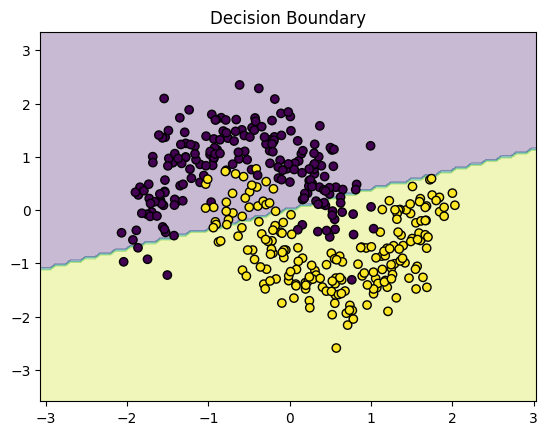

In [10]:
parameters = train_model(X_train, Y_train, num_epochs=1000, learning_rate=0.1)
Y_pred_train = predict(X_train, parameters)
Y_pred_test = predict(X_test, parameters)

train_accuracy = np.mean(Y_pred_train == Y_train) * 100
test_accuracy = np.mean(Y_pred_test == Y_test) * 100
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Testing Accuracy: {test_accuracy:.2f}%")

def plot_decision_boundary(X, Y, parameters):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = predict(np.c_[xx.ravel(), yy.ravel()], parameters)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=Y.ravel(), edgecolors='k')
    plt.title("Decision Boundary")
    plt.show()

plot_decision_boundary(X_train, Y_train, parameters)